In [2]:
import matplotlib.pyplot as plt
import pandas as pd

pareto_decomp_df = pd.read_csv("C:\\Users\\DeepakArun\\Documents\\Desktop\\Robyn_202408150628_init\\pareto_alldecomp_matrix.csv")
pareto_decomp_df = pareto_decomp_df[pareto_decomp_df['solID']=='4_1818_7']

C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_17092\1454228702.py:4: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  pareto_decomp_df = pd.read_csv("C:\\Users\\DeepakArun\\Documents\\Desktop\\Robyn_202408150628_init\\pareto_alldecomp_matrix.csv")


In [5]:
base_cols = ['dep_var', 'trend', 'season', 'holiday', 'Preference',
       'US.Weather.Impact.Rating', 'Net.Trust', 'NPS',
       'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag']
print(len(base_cols))
organic_cols = ['OrganicSearch_Google_Clicks',
       'SocialEng_Twitter_Total_Engagements',
       'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions',
       'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks',
       'SocialEng_Instagram_Estimated_Clicks'
               ]
print(len(organic_cols))
paid_media_cols = ['SEM_Google_Spend',
       'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend',
       'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend',
       'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend',
       'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend',
       'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend']

print(len(paid_media_cols))

paid_organic_cols = ['OrganicSearch_Google_Clicks_Paid_Spend',
       'SocialEng_Facebook_Estimated_Clicks_Paid_Spend',
       'SocialEng_YouTube_Estimated_Clicks_Paid_Spend',
       'SocialEng_Instagram_Estimated_Clicks_Paid_Spend',
       'SocialEng_Twitter_Total_Engagements_Paid_Spend',
       'SocialEng_LinkedIn_Impressions_Paid_Spend',
       'SocialEng_TikTok_Impressions_Paid_Spend']

print(len(paid_organic_cols))

10
7
12
7


In [6]:
pareto_decomp_df['Base'] = pareto_decomp_df[base_cols].sum(axis=1)
pareto_decomp_df['Organic'] = pareto_decomp_df[organic_cols].sum(axis=1)
pareto_decomp_df['Paid_Media'] = pareto_decomp_df[paid_media_cols].sum(axis=1)
pareto_decomp_df['Paid_Media_effect_on_Organic'] = pareto_decomp_df[paid_organic_cols].sum(axis=1)

In [8]:
area_chart_df = pareto_decomp_df[['ds','Base','Organic','Paid_Media','Paid_Media_effect_on_Organic']].reset_index(drop=True)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming area_chart_df is your original DataFrame
df = area_chart_df.copy()

# Define the columns
column1 = 'Base'
column2 = 'Organic'
column3 = 'Paid_Media'
column4 = 'Paid_Media_effect_on_Organic'

# Convert 'ds' to datetime and set it as the index
#df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
df.set_index('ds', inplace=True)

# Normalize the data to get percentages for the stacked area chart
df_percentage = df.div(df.sum(axis=1), axis=0)


In [11]:
df_percentage = df_percentage.reset_index()
df_percentage

,ds,Base,Organic,Paid_Media,Paid_Media_effect_on_Organic
0,2021-09-01,0.892491,0.102782,0.000066,0.004661
1,2021-09-02,0.933947,0.063578,0.000224,0.002251
2,2021-09-03,0.958017,0.040543,0.000492,0.000949
3,2021-09-04,0.974722,0.023472,0.000817,0.000989
4,2021-09-05,0.959085,0.038315,0.001157,0.001442
...,...,...,...,...,...
999,2024-05-27,0.741821,0.193553,0.042834,0.021792
1000,2024-05-28,0.719599,0.218241,0.042200,0.019960
1001,2024-05-29,0.770236,0.168304,0.050498,0.010962
1002,2024-05-30,0.750697,0.180061,0.048310,0.020933


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

def plot_pct_orders_heat_map(
    df, ds, base, organic, paid_media, paid_Media_effect_on_Organic, title="", fig_label="", save_dir=""
):
    """
    Plot pct of base, organic, paid media, and paid organic orders.
    Displays average pct for base, organic, paid media, and paid organic on the right side y-axis 
    with a dotted horizontal line, and prints the avg pct values directly on the right side y-axis.

    Params:
        df: DataFrame - The data frame to plot.
        ds: str - Column for dates.
        base: str - Column for pct orders from base.
        organic: str - Column for pct orders from organic.
        paid_media: str - Column for pct orders from paid media.
        paid_organic: str - Column for pct orders from paid organic.
        title: str - Title for the plot.
        fig_label: str - Label/name for the plot.
        save_dir: str - Path to save the plot.
    """
    assert all(c in df.columns for c in [ds, base, organic, paid_media, paid_Media_effect_on_Organic])

    # Ensure ds is a datetime column
    df[ds] = pd.to_datetime(df[ds])
    df = df.rename({ds: 'Date'}, axis=1)
    ds = 'Date'
    df_plot = df.copy()

    # Sort df_plot by ds to ensure the dates are in order
    df_plot.sort_values(by=ds, inplace=True)

    # Combine columns to calculate cumulative percentages
    df_plot["pct_base_organic"] = df_plot[base] + df_plot[organic]
    df_plot["pct_base_organic_media"] = df_plot["pct_base_organic"] + df_plot[paid_media]
    df_plot["all"] = df_plot["pct_base_organic_media"] + df_plot[paid_Media_effect_on_Organic]
    df_plot["all"] = np.where(df_plot["all"] > 1.0, 1.0, df_plot["all"])

    # Calculate averages
    avg_base = df_plot[base].mean()
    avg_organic = df_plot[organic].mean()
    avg_paid_media = df_plot[paid_media].mean()
    avg_paid_media_organic_interaction = df_plot[paid_Media_effect_on_Organic].mean()

    avg_organic_line = df_plot["pct_base_organic"].mean()
    avg_media_line = df_plot["pct_base_organic_media"].mean()
    avg_other_line = df_plot["all"].mean()

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    ax2 = axs.twinx()  # Create a second y-axis to display the average values

    # Plot the data
    sns.lineplot(data=df_plot, x=ds, y=base, color="blue", ax=axs)
    sns.lineplot(data=df_plot, x=ds, y="pct_base_organic", color="orange", ax=axs)
    sns.lineplot(data=df_plot, x=ds, y="pct_base_organic_media", color="green", ax=axs)
    sns.lineplot(data=df_plot, x=ds, y="all", color="red", ax=axs)

    # Adding horizontal lines for averages on the main y-axis
    axs.axhline(y=avg_base, color="blue", linestyle="--", label=f"Average {base}")
    axs.axhline(y=avg_organic_line, color="orange", linestyle="--", label=f"Average Organic")
    axs.axhline(y=avg_media_line, color="green", linestyle="--", label=f"Average Paid Media")
    axs.axhline(y=avg_other_line, color="red", linestyle="--", label=f"Average Paid Media effect on Organic")

    # Format x-axis to display dates correctly
    axs.xaxis.set_major_locator(mdates.AutoDateLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    plt.xticks(rotation=0)
    fig.autofmt_xdate()  # Auto format date labels for readability

    # Fill between the lines to show the stacked contributions
    plt.fill_between(df_plot[ds], df_plot[base], df_plot["pct_base_organic"], color="orange", alpha=0.5)
    plt.fill_between(df_plot[ds], df_plot["pct_base_organic"], df_plot["pct_base_organic_media"], color="green", alpha=0.5)
    plt.fill_between(df_plot[ds], df_plot["pct_base_organic_media"], df_plot["all"], color="red", alpha=0.5)
    plt.fill_between(df_plot[ds], 0, df_plot[base], color="blue", alpha=0.5)

    # Setting the average values on the right y-axis
    ax2.set_yticks([avg_base, avg_organic_line, avg_media_line, avg_other_line])
    ax2.set_yticklabels([f"Avg Base {avg_base:.2%}", f"Avg Organic {avg_organic:.2%}", f"Avg Paid Media {avg_paid_media:.2%}", f"Avg Paid Media effect on Organic {avg_paid_media_organic_interaction:.2%}"])
    ax2.set_ylim(axs.get_ylim())  # Ensure the right y-axis aligns with the left y-axis
    plt.xlabel('Date')
    plt.ylabel('Percentage')

    axs.legend(loc="upper left")
    axs.set_title(title, fontsize=16, fontdict={"weight": "normal"}, loc="left")

    # Save the plot if a directory is specified
    if save_dir:
        plt.savefig(f"{save_dir}/{fig_label}.png", bbox_inches="tight", transparent=False)
        plt.close()



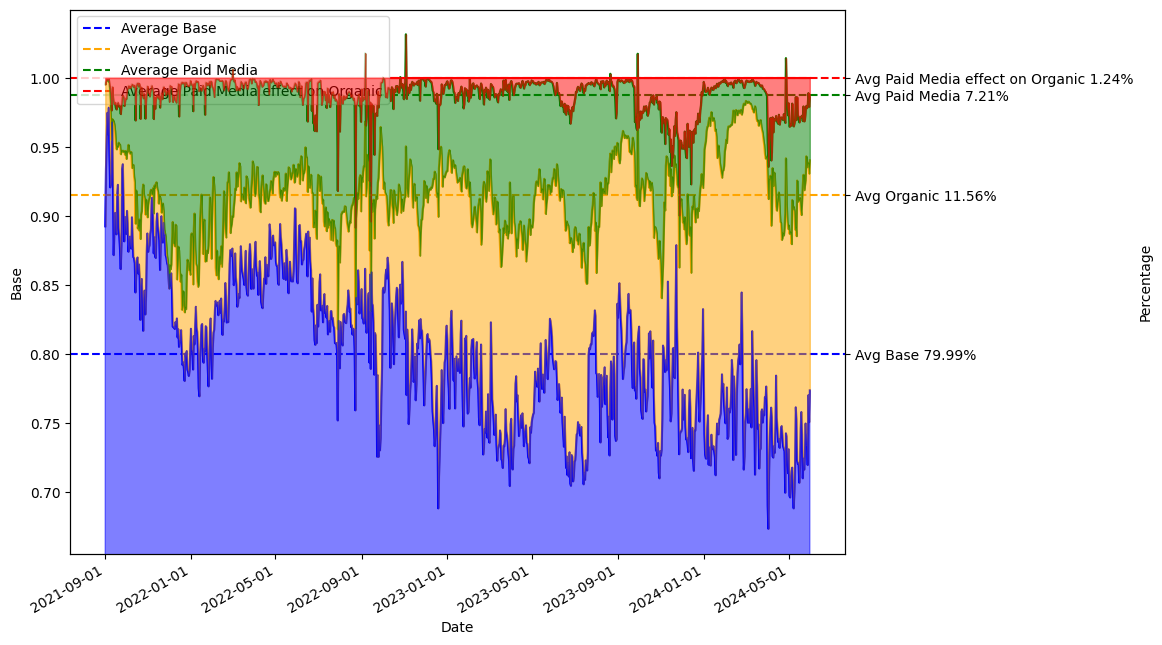

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
plot_pct_orders_heat_map(
    df_percentage, 'ds', 'Base', 'Organic', 'Paid_Media','Paid_Media_effect_on_Organic', title="", fig_label="", save_dir=""
)